In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from preprocessing import preprocess

In [3]:
X, y = preprocess("train.csv", test=False)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split

In [5]:
std = StandardScaler()
columns = X.columns
X = pd.DataFrame(columns=columns, data=std.fit_transform(X))

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [7]:
results = cross_val_score(RandomForestClassifier(), X, y, scoring='f1')
results

array([0.89705882, 0.90936107, 0.9246988 , 0.90361446, 0.90029326])

In [8]:
results = cross_val_score(LogisticRegression(), X, y, scoring='f1')
results

array([0.90350877, 0.91285081, 0.92771084, 0.91310751, 0.90647482])

In [9]:
results = cross_val_score(xgb.XGBClassifier(), X, y, scoring='f1')
results

array([0.89411765, 0.9037037 , 0.91212121, 0.89634146, 0.89725036])

# Visualization of the results

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

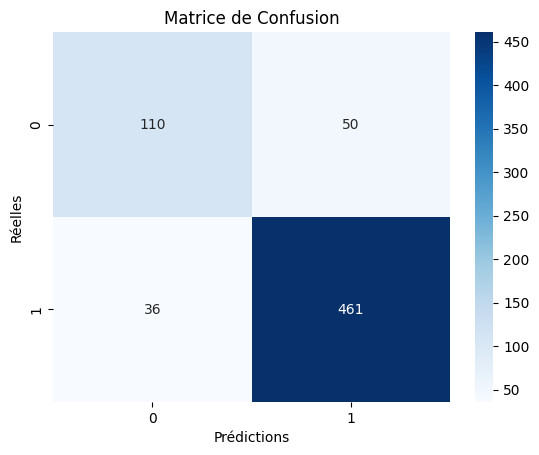

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

cm = confusion_matrix(y_valid, y_pred)
# Affichage de la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.title('Matrice de Confusion')
plt.show()

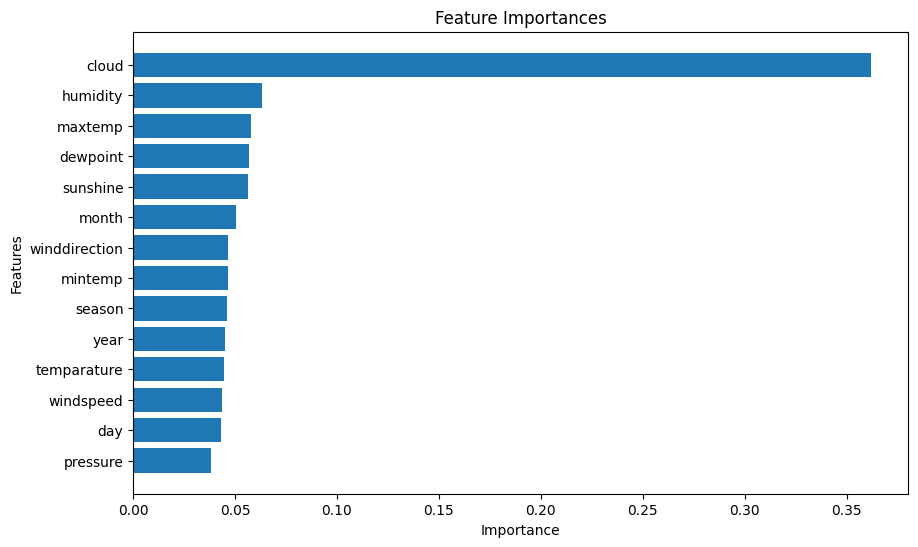

In [12]:
# Importance des variables
importances = model.feature_importances_
features = X_train.columns

# Affichage
import pandas as pd
import matplotlib.pyplot as plt

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:15], importance_df['Importance'][:15])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

# Submission

In [13]:
model = xgb.XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
X_test = preprocess("test.csv", test=True)
X_test.head(3)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,year,month,season
id,,,,,,,,,,,,,,
2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3,2023,1,0
2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3,2023,1,0
2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9,2023,1,0


In [16]:
id_submission = X_test.index

In [18]:
predictions = model.predict(X_test)

In [ ]:
submission = pd.DataFrame(columns=['id', 'rainfall'])
submission['id'] = id_submission
submission['rainfall'] = predictions
submission.head()

,id,rainfall
0,2190,0.393163
1,2191,0.347030
2,2192,0.347030
3,2193,0.075692
4,2194,0.075692


In [22]:
submission.to_csv('submission.csv')